In [1]:
# Multilinear Regression
import pandas as pd
import numpy as np
import seaborn as sns
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 


In [7]:
#loading the data
df = pd.read_csv(r"C:\Users\Vinnu Dasari\OneDrive\Desktop\Assigments\Multiple Linear Regression\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df = pd.get_dummies(df)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [9]:
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [28]:
df.rename(columns={'R&D Spend':'R_D','Marketing Spend':'Marketing_spend', 'State_New York':'State_New_York'},inplace=True)
df.columns

Index(['R_D', 'Administration', 'Marketing_spend', 'Profit',
       'State_California', 'State_Florida', 'State_New_York'],
      dtype='object')

<BarContainer object of 50 artists>

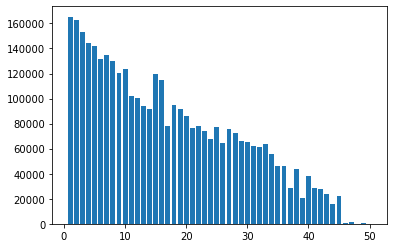

In [11]:
# R&D Spend
plt.bar(height = df.R_D, x = np.arange(1, 51, 1))

(array([6., 6., 4., 7., 8., 5., 3., 5., 3., 3.]),
 array([     0.  ,  16534.92,  33069.84,  49604.76,  66139.68,  82674.6 ,
         99209.52, 115744.44, 132279.36, 148814.28, 165349.2 ]),
 <a list of 10 Patch objects>)

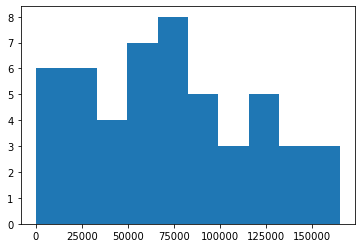

In [12]:
plt.hist(df.R_D) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x2e8f8bfc8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e8f8c0a040>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e8f8bfc580>],
 'medians': [<matplotlib.lines.Line2D at 0x2e8f8c0a700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e8f8c0aa00>],
 'means': []}

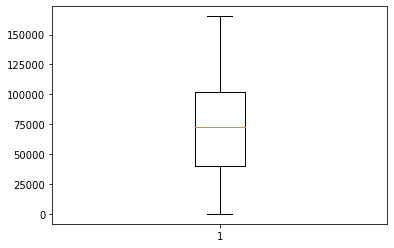

In [13]:
plt.boxplot(df.R_D) #boxplot

<BarContainer object of 50 artists>

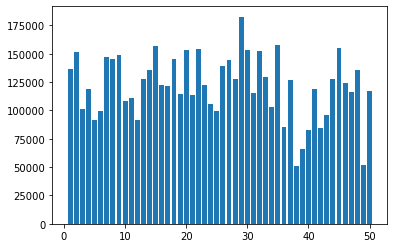

In [14]:
# Administration
plt.bar(height = df.Administration, x = np.arange(1, 51, 1))

(array([ 2.,  1.,  3.,  7.,  7., 12.,  4., 11.,  2.,  1.]),
 array([ 51283.14 ,  64419.382,  77555.624,  90691.866, 103828.108,
        116964.35 , 130100.592, 143236.834, 156373.076, 169509.318,
        182645.56 ]),
 <a list of 10 Patch objects>)

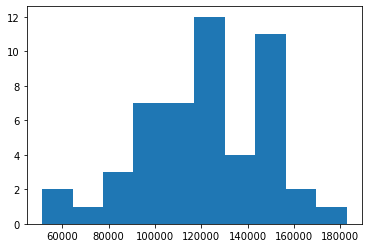

In [15]:
plt.hist(df.Administration) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x2e8f8da2760>,
 'caps': [<matplotlib.lines.Line2D at 0x2e8f8da2e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e8f8da2400>],
 'medians': [<matplotlib.lines.Line2D at 0x2e8f8dab520>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e8f8dab820>],
 'means': []}

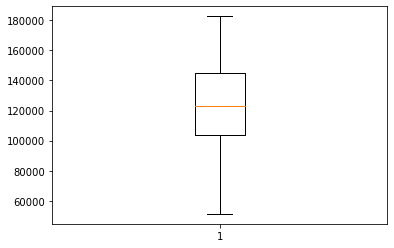

In [16]:
plt.boxplot(df.Administration) #boxplot

<BarContainer object of 50 artists>

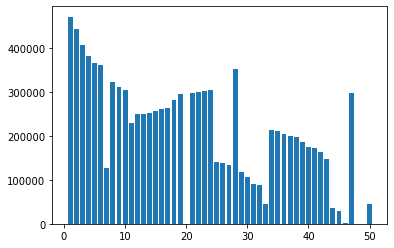

In [17]:
# Marketing 
plt.bar(height = df.Marketing_spend, x = np.arange(1, 51, 1))

(array([8., 2., 6., 5., 6., 7., 9., 3., 2., 2.]),
 array([     0.  ,  47178.41,  94356.82, 141535.23, 188713.64, 235892.05,
        283070.46, 330248.87, 377427.28, 424605.69, 471784.1 ]),
 <a list of 10 Patch objects>)

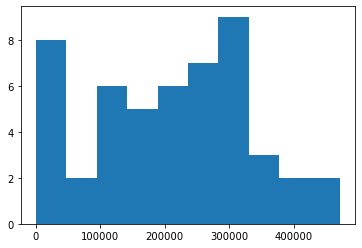

In [18]:
plt.hist(df.Marketing_spend) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x2e8f8f380a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e8f8f38760>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e8f8f2ad00>],
 'medians': [<matplotlib.lines.Line2D at 0x2e8f8f38e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e8f8f41160>],
 'means': []}

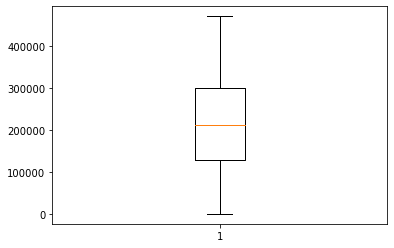

In [19]:
plt.boxplot(df.Marketing_spend) #boxplot

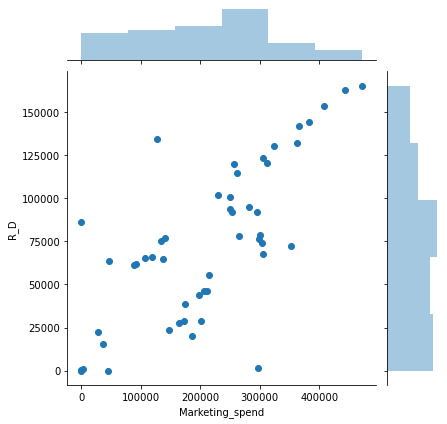

In [25]:
# Jointplot
import seaborn as sns
sns.jointplot(x=df['Marketing_spend'], y=df['R_D'])

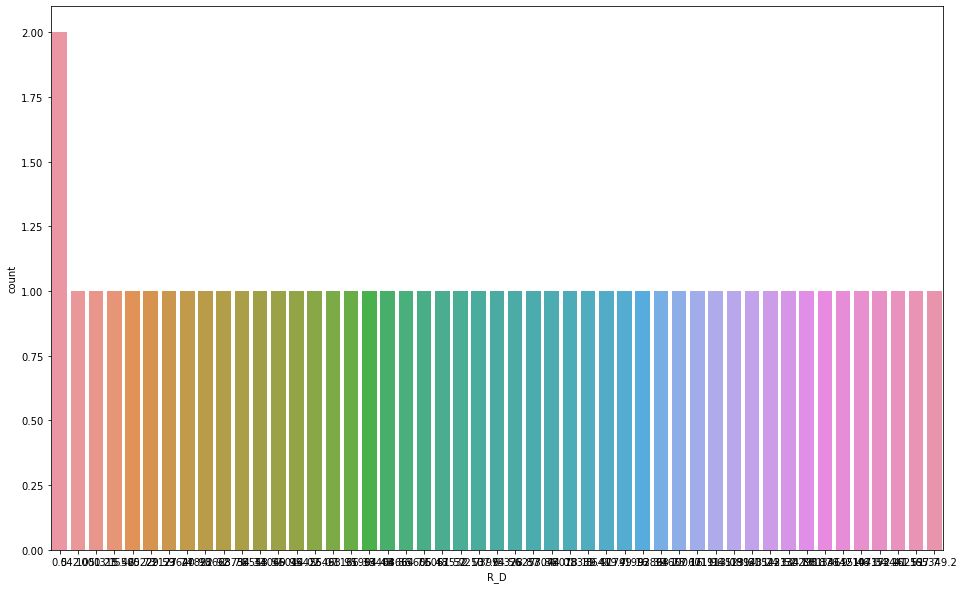

In [21]:
# Countplot
plt.figure(1, figsize=(16, 10))
sns.countplot(df['R_D'])

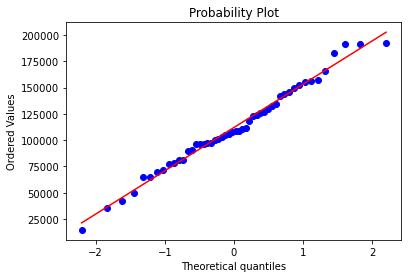

In [22]:
# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(df.Profit, dist = "norm", plot = pylab)
plt.show()

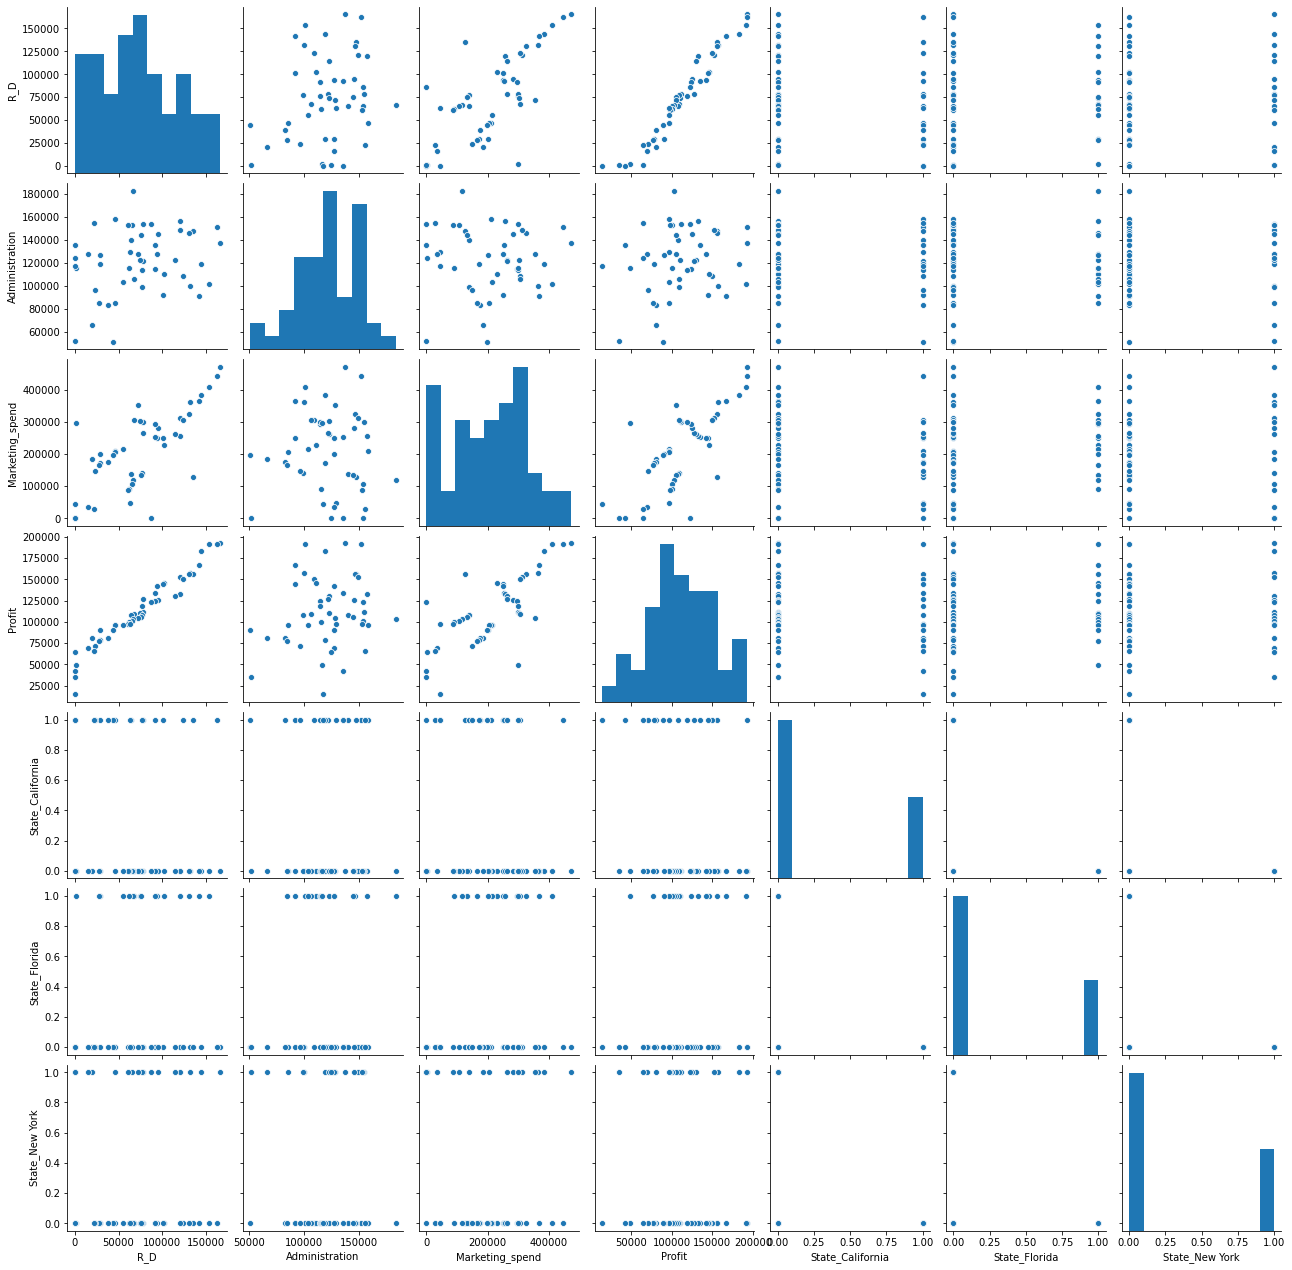

In [23]:
# Scatter plot between the variables along with histograms
sns.pairplot(df.iloc[:, :])

In [24]:
# Correlation matrix 
df.corr()

,R_D,Administration,Marketing_spend,Profit,State_California,State_Florida,State_New York
R_D,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [26]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model

In [29]:
ml1 = smf.ols('Profit ~ R_D + Administration + Marketing_spend + State_California + State_Florida + State_New_York', data = df).fit() # regression model

In [30]:
# Summary
ml1.summary()
# p-values for Administration, Markting spend are more than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.34e-27
Time:                        20:12:31   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
R_D                  0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_New_York    1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.84e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

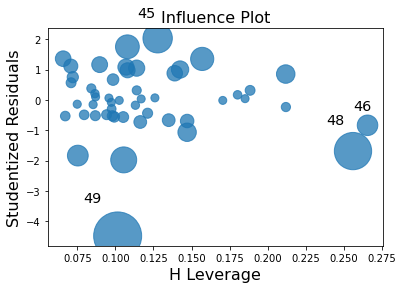

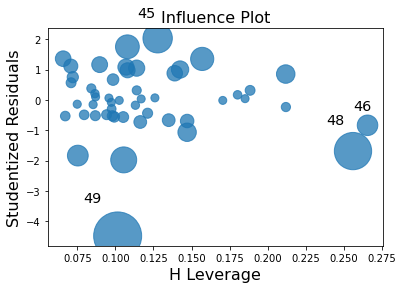

In [32]:
sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 49 and 46 are showing high influence so we can exclude that entire row

In [68]:
df_new = df.drop(df.index[[46,49]])
df_new.describe()

,R_D,Administration,Marketing_spend,Profit,State_California,State_Florida,State_New_York
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,76765.944167,121550.666042,212686.820208,115342.912708,0.333333,0.312500,0.354167
std,44272.236013,28588.514426,121842.265020,37385.316581,0.476393,0.468417,0.483321
min,0.000000,51283.140000,0.000000,35673.410000,0.000000,0.000000,0.000000
25%,45528.002500,102579.505000,132466.757500,95036.680000,0.000000,0.000000,0.000000
50%,74661.715000,123467.895000,212716.240000,108643.015000,0.000000,0.000000,0.000000
75%,105065.712500,145190.700000,300632.782500,142253.990000,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [69]:
# Preparing model                  
ml_new = smf.ols('Profit ~ R_D + Administration + Marketing_spend + State_California + State_Florida + State_New_York', data = df_new).fit()    

In [70]:
# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 16 May 2021   Prob (F-statistic):           2.11e-28
Time:                        20:17:48   Log-Likelihood:                -495.24
No. Observations:                  48   AIC:                             1002.
Df Residuals:                      42   BIC:                             1014.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.866e+04   4238.238      9.123      0.000    3.01e+04    4.72e+04
R_D                  0.7579      0.044     17.304      0.000       0.669       0.846
Administration      -0.0126      0.044     -0.286      0.776      -0.101       0.076
Marketing_spend      0.0337      0.016      2.170      0.036       0.002       0.065
State_California  1.384e+04   2089.380      6.624      0.000    9624.018    1.81e+04
State_Florida     1.286e+04   2266.549      5.674      0.000    8287.254    1.74e+04
State_New_York    1.196e+04   2076.347      5.761      0.000    7772.348    1.62e+04
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.259
Skew:                           0.020   Prob(JB):                        0.878
Kurtosis:                       2.642   Cond. No.                     1.32e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.16e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

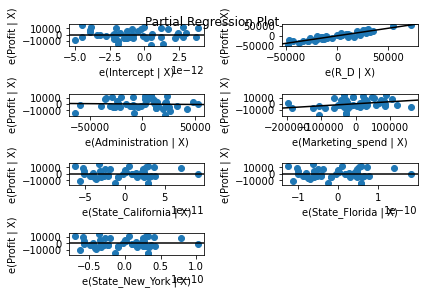

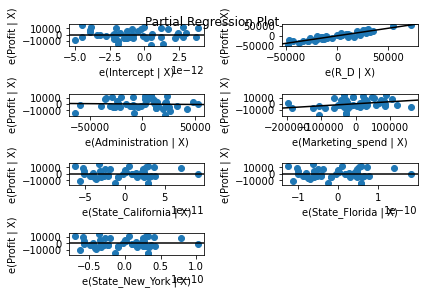

In [71]:
sm.graphics.plot_partregress_grid(ml_new)

In [72]:
# Check for Colinearity to decide to remove a variable using VIF (variance inflation factor)
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_rd = smf.ols('R_D ~ Administration + Marketing_spend + State_California + State_Florida + State_New_York', data = df_new).fit().rsquared  
rsq_rd

0.6533146128781457

In [73]:
vif_rd = 1/(1 - rsq_rd) 
vif_rd

2.88445962000849

In [74]:
rsq_ad = smf.ols('Administration ~ R_D + Marketing_spend + State_California + State_Florida + State_New_York', data = df_new).fit().rsquared  
rsq_ad

0.17486377442380774

In [75]:
vif_ad = 1/(1 - rsq_ad) 
vif_ad

1.2119210973941914

In [76]:
rsq_ms = smf.ols('Marketing_spend ~ R_D + Administration + State_California + State_Florida + State_New_York', data = df_new).fit().rsquared  
rsq_ms

0.6348061462077765

In [77]:
vif_ms = 1/(1 - rsq_ms) 
vif_ms

2.7382717140933828

In [78]:
# Storing vif values in a data frame
d1 = {'Variables':['R_D', 'Administration', 'Marketing Spend'], 'VIF':[vif_rd, vif_ad, vif_ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,R_D,2.884460
1,Administration,1.211921
2,Marketing Spend,2.738272


In [79]:
# Final model
final_ml = smf.ols('Profit ~ R_D + Marketing_spend + State_California + State_Florida + State_New_York', data = df_new).fit()
final_ml.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     263.2
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.26e-29
Time:                        20:17:50   Log-Likelihood:                -495.29
No. Observations:                  48   AIC:                             1001.
Df Residuals:                      43   BIC:                             1010.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.757e+04   1808.666     20.773      0.000    3.39e+04    4.12e+04
R_D                  0.7527      0.039     19.108      0.000       0.673       0.832
Marketing_spend      0.0352      0.014      2.450      0.018       0.006       0.064
State_California  1.347e+04   1634.789      8.243      0.000    1.02e+04    1.68e+04
State_Florida     1.249e+04   1835.738      6.803      0.000    8787.068    1.62e+04
State_New_York    1.161e+04   1644.867      7.056      0.000    8289.783    1.49e+04
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.286
Skew:                           0.038   Prob(JB):                        0.867
Kurtosis:                       2.630   Cond. No.                     1.37e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
# Prediction
pred = final_ml.predict(df_new)
pred

0     190239.347176
1     189054.677645
2     179911.274621
3     171332.300644
4     169910.099251
5     161211.389980
6     156862.386497
7     159532.874555
8     150876.246940
9     154612.473529
10    134834.056098
11    135610.326403
12    129503.604533
13    129180.346844
14    149367.608630
15    144591.535490
16    119069.891859
17    130370.985628
18    129499.065360
19    114222.998768
20    118953.940355
21    118731.116333
22    116431.544624
23    111618.842262
24    112115.164272
25    104573.749206
26    111476.752039
27    115884.556498
28    103934.213151
29    102328.685590
30     99929.504318
31     98298.880574
32    100393.998261
33     99384.707625
34     93410.339768
35     91046.335998
36     78715.072283
37     91152.267832
38     70926.365318
39     86228.446420
40     78771.625124
41     76844.420649
42     74050.072275
43     62099.652029
44     68735.958893
45     49997.955619
47     51046.079090
48     49586.073141
dtype: float64

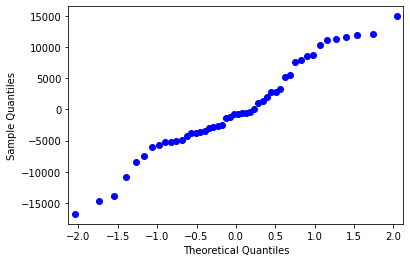

In [81]:
# Q-Q plot
res = final_ml.resid   #IID Normal test
sm.qqplot(res)
plt.show()

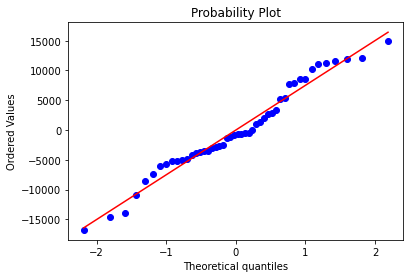

In [82]:
# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

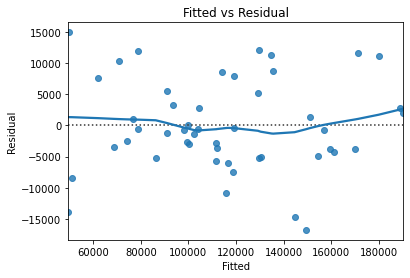

In [83]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = df_new.Profit, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

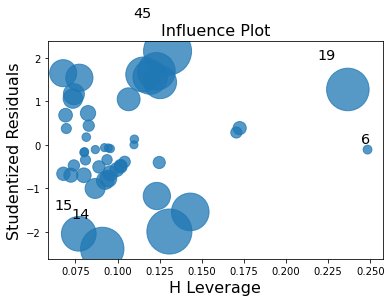

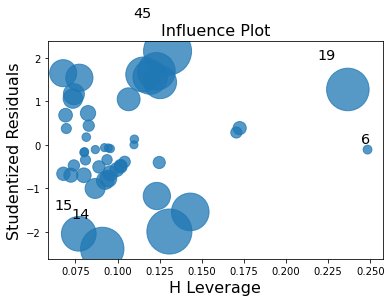

In [84]:
sm.graphics.influence_plot(final_ml)

In [85]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_new, test_size = 0.3) # 30% test data

In [86]:
# preparing the model on train data 
model_train = smf.ols("Profit ~ R_D + Marketing_spend + State_California + State_Florida + State_New_York", data = df_train).fit()

In [87]:
# prediction on test data set 
test_pred = model_train.predict(df_test)
test_pred

15    145883.590909
26    115378.877010
1     189220.763451
23    115144.926342
28    107736.326486
19    115550.912845
11    135248.444008
41     80057.950903
34     92377.967104
17    131361.872239
14    153677.732554
8     152170.499383
9     154468.901074
33    102891.254527
7     163875.925938
dtype: float64

In [88]:
# test residual values 
test_resid = test_pred - df_test.Profit
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

8863.410624043843

In [89]:
# train_data prediction
train_pred = model_train.predict(df_train)
train_pred

13    128696.666024
44     67665.683170
39     85146.653219
16    118378.975007
42     72809.730842
22    120047.159230
35     91502.814780
21    119475.180095
20    118184.838677
24    113093.532537
6     157152.272535
31     99145.559885
25    103903.113604
5     162577.355133
40     77560.980132
47     49721.369816
45     50169.766895
38     71066.903488
12    133472.265414
48     49754.719471
43     62413.928942
10    138944.176052
29    103205.682011
32     99852.147723
30    103719.706300
0     191884.381398
27    116459.042885
18    133367.674186
2     184433.405546
37     90109.929252
3     172834.682480
4     174345.479827
36     81880.863443
dtype: float64

In [90]:
# train residual values 
train_resid  = train_pred - df_train.Profit
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

7081.9592979006175